# ESMPy regridding with Grid, Mesh and LocStream

This example demonstrates how to regrid a basic Field read from a CF formatted netCDF file.

In [1]:
import ESMF
import numpy

In [2]:
import os
DD = os.path.join(os.getcwd(), "ESMPy-data")

Create a uniform global latlon grid from a GRIDSPEC formatted file

In [3]:
grid = ESMF.Grid(filename=os.path.join(DD, "tas_day_CanCM4_decadal2000_r2i1p1_20010101-20101231.nc"),
                 filetype=ESMF.FileFormat.GRIDSPEC, add_corner_stagger=True)

Create Fields on the centers of the Grid cells

In [4]:
srcfield = ESMF.Field(grid)

Read Field data from "tas" variable in the file.

In [5]:
srcfield.read(filename=os.path.join(DD, "tas_day_CanCM4_decadal2000_r2i1p1_20010101-20101231.nc"), variable="tas")

Create a destination grid from a SCRIP formatted file

In [6]:
dstgrid = ESMF.Grid(filename=os.path.join(DD, "T42_grid.nc"), filetype=ESMF.FileFormat.SCRIP, add_corner_stagger=True)

Create a destination Field on the centers of the Grid cells


In [7]:
dstfield = ESMF.Field(dstgrid)

Create an object to regrid data from the source to the destination Field using conservative regridding

In [8]:
regridS2D = ESMF.Regrid(srcfield, dstfield, regrid_method=ESMF.RegridMethod.CONSERVE, 
                        unmapped_action=ESMF.UnmappedAction.IGNORE)

In [9]:
dstfield = regridS2D(srcfield, dstfield, zero_region=ESMF.Region.SELECT)

In [10]:
regridD2S = ESMF.Regrid(dstfield, solution, regrid_method=ESMF.RegridMethod.CONSERVE, 
                        unmapped_action=ESMF.UnmappedAction.IGNORE)

In [11]:
solution = regridS2D(dstfield, solution, zero_region=ESMF.Region.SELECT)

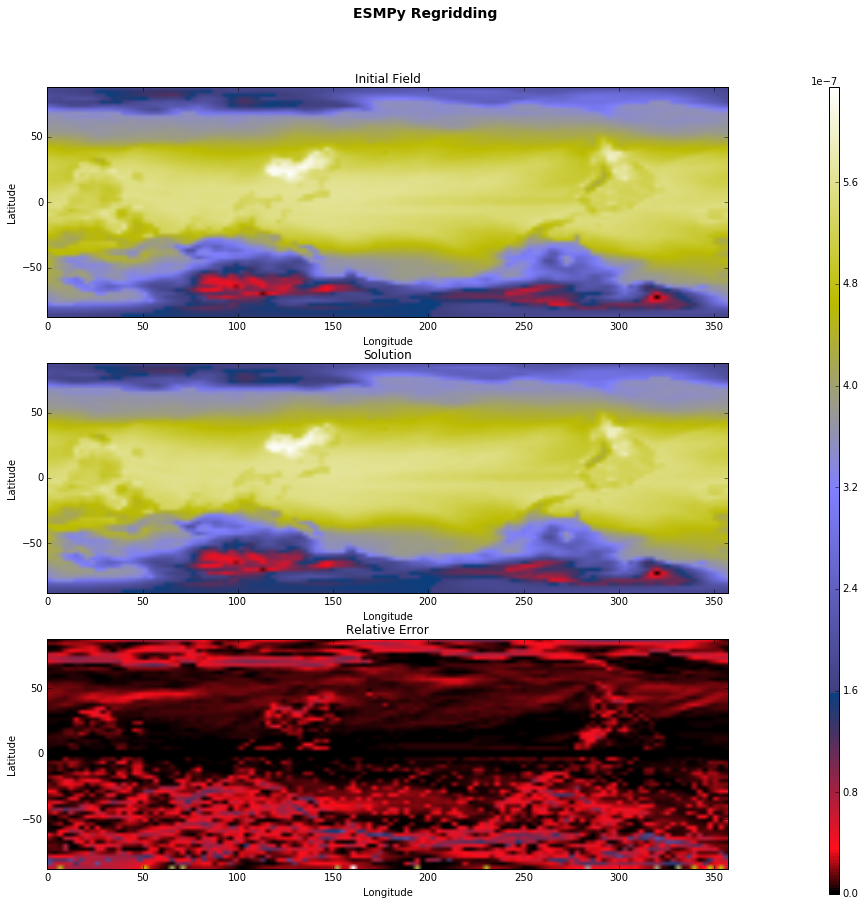

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

colormap = "gist_stern"
lons = solution.grid.get_coords(0)
lats = solution.grid.get_coords(1)

fig = plt.figure(1, (14, 14))
fig.suptitle('ESMPy Regridding', fontsize=14, fontweight='bold')

init = numpy.copy(srcfield.data.T)

ax = fig.add_subplot(3, 1, 1)
im = ax.imshow(init, vmin=numpy.min(init),
               vmax=numpy.max(init), cmap=colormap, aspect='auto',
               extent=[numpy.min(lons), numpy.max(lons),
                       numpy.min(lats), numpy.max(lats)])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Initial Field")

sol = numpy.copy(solution.data.T)

ax = fig.add_subplot(3, 1, 2)
im1 = ax.imshow(sol, vmin=numpy.min(sol),
                vmax=numpy.max(sol), cmap=colormap, aspect='auto',
                extent=[numpy.min(lons), numpy.max(lons),
                        numpy.min(lats), numpy.max(lats)])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Solution")

relerr = numpy.abs(solution.data.T - srcfield.data.T)/numpy.abs(srcfield.data.T)

ax = fig.add_subplot(3, 1, 3)
im1 = ax.imshow(relerr, vmin=numpy.min(relerr),
                vmax=numpy.max(relerr), cmap=colormap, aspect='auto',
                extent=[numpy.min(lons), numpy.max(lons),
                        numpy.min(lats), numpy.max(lats)])
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Relative Error")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.9, 0.1, 0.01, 0.8])
fig.colorbar(im1, cax=cbar_ax)

plt.show()